In [ ]:
# Mount Google Drive to access files
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# General libraries
import os
import random
import numpy as np
from shutil import copyfile

# Image processing and manipulation
import cv2
import matplotlib.pyplot as plt

# Model handling
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight

# MediaPipe for hand landmark extraction
import mediapipe as mp


In [ ]:
base_dir = '/content/drive/My Drive/signlanguage/'
!ls "/content/drive/My Drive/signlanguage/"

# Define directories for each folder 'bahan', 'train', 'validation', and 'test'
bahan_dir = os.path.join(base_dir,'bahan')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

bahan  test  train  validation


In [ ]:
# Define directories for each letter (A-Z) under the 'bahan' directory
A_dir = os.path.join(bahan_dir,'A/')
B_dir = os.path.join(bahan_dir,'B/')
C_dir = os.path.join(bahan_dir,'C/')
D_dir = os.path.join(bahan_dir,'D/')
E_dir = os.path.join(bahan_dir,'E/')
F_dir = os.path.join(bahan_dir,'F/')
G_dir = os.path.join(bahan_dir,'G/')
H_dir = os.path.join(bahan_dir,'H/')
I_dir = os.path.join(bahan_dir,'I/')
J_dir = os.path.join(bahan_dir,'J/')
K_dir = os.path.join(bahan_dir,'K/')
L_dir = os.path.join(bahan_dir,'L/')
M_dir = os.path.join(bahan_dir,'M/')
N_dir = os.path.join(bahan_dir,'N/')
O_dir = os.path.join(bahan_dir,'O/')
P_dir = os.path.join(bahan_dir,'P/')
Q_dir = os.path.join(bahan_dir,'Q/')
R_dir = os.path.join(bahan_dir,'R/')
S_dir = os.path.join(bahan_dir,'S/')
T_dir = os.path.join(bahan_dir,'T/')
U_dir = os.path.join(bahan_dir,'U/')
V_dir = os.path.join(bahan_dir,'V/')
W_dir = os.path.join(bahan_dir,'W/')
X_dir = os.path.join(bahan_dir,'X/')
Y_dir = os.path.join(bahan_dir,'Y/')
Z_dir = os.path.join(bahan_dir,'Z/')


In [ ]:
# Define directories for training data (A-Z)
train_A = os.path.join(train_dir, 'A/')
train_B = os.path.join(train_dir, 'B/')
train_C = os.path.join(train_dir, 'C/')
train_D = os.path.join(train_dir, 'D/')
train_E = os.path.join(train_dir, 'E/')
train_F = os.path.join(train_dir, 'F/')
train_G = os.path.join(train_dir, 'G/')
train_H = os.path.join(train_dir, 'H/')
train_I = os.path.join(train_dir, 'I/')
train_J = os.path.join(train_dir, 'J/')
train_K = os.path.join(train_dir, 'K/')
train_L = os.path.join(train_dir, 'L/')
train_M = os.path.join(train_dir, 'M/')
train_N = os.path.join(train_dir, 'N/')
train_O = os.path.join(train_dir, 'O/')
train_P = os.path.join(train_dir, 'P/')
train_Q = os.path.join(train_dir, 'Q/')
train_R = os.path.join(train_dir, 'R/')
train_S = os.path.join(train_dir, 'S/')
train_T = os.path.join(train_dir, 'T/')
train_U = os.path.join(train_dir, 'U/')
train_V = os.path.join(train_dir, 'V/')
train_W = os.path.join(train_dir, 'W/')
train_X = os.path.join(train_dir, 'X/')
train_Y = os.path.join(train_dir, 'Y/')
train_Z = os.path.join(train_dir, 'Z/')

# Define directories for validation data (A-Z)
validation_A = os.path.join(validation_dir, 'A/')
validation_B = os.path.join(validation_dir, 'B/')
validation_C = os.path.join(validation_dir, 'C/')
validation_D = os.path.join(validation_dir, 'D/')
validation_E = os.path.join(validation_dir, 'E/')
validation_F = os.path.join(validation_dir, 'F/')
validation_G = os.path.join(validation_dir, 'G/')
validation_H = os.path.join(validation_dir, 'H/')
validation_I = os.path.join(validation_dir, 'I/')
validation_J = os.path.join(validation_dir, 'J/')
validation_K = os.path.join(validation_dir, 'K/')
validation_L = os.path.join(validation_dir, 'L/')
validation_M = os.path.join(validation_dir, 'M/')
validation_N = os.path.join(validation_dir, 'N/')
validation_O = os.path.join(validation_dir, 'O/')
validation_P = os.path.join(validation_dir, 'P/')
validation_Q = os.path.join(validation_dir, 'Q/')
validation_R = os.path.join(validation_dir, 'R/')
validation_S = os.path.join(validation_dir, 'S/')
validation_T = os.path.join(validation_dir, 'T/')
validation_U = os.path.join(validation_dir, 'U/')
validation_V = os.path.join(validation_dir, 'V/')
validation_W = os.path.join(validation_dir, 'W/')
validation_X = os.path.join(validation_dir, 'X/')
validation_Y = os.path.join(validation_dir, 'Y/')
validation_Z = os.path.join(validation_dir, 'Z/')

# Define directories for test data (A-Z)
test_A = os.path.join(test_dir, 'A/')
test_B = os.path.join(test_dir, 'B/')
test_C = os.path.join(test_dir, 'C/')
test_D = os.path.join(test_dir, 'D/')
test_E = os.path.join(test_dir, 'E/')
test_F = os.path.join(test_dir, 'F/')
test_G = os.path.join(test_dir, 'G/')
test_H = os.path.join(test_dir, 'H/')
test_I = os.path.join(test_dir, 'I/')
test_J = os.path.join(test_dir, 'J/')
test_K = os.path.join(test_dir, 'K/')
test_L = os.path.join(test_dir, 'L/')
test_M = os.path.join(test_dir, 'M/')
test_N = os.path.join(test_dir, 'N/')
test_O = os.path.join(test_dir, 'O/')
test_P = os.path.join(test_dir, 'P/')
test_Q = os.path.join(test_dir, 'Q/')
test_R = os.path.join(test_dir, 'R/')
test_S = os.path.join(test_dir, 'S/')
test_T = os.path.join(test_dir, 'T/')
test_U = os.path.join(test_dir, 'U/')
test_V = os.path.join(test_dir, 'V/')
test_W = os.path.join(test_dir, 'W/')
test_X = os.path.join(test_dir, 'X/')
test_Y = os.path.join(test_dir, 'Y/')
test_Z = os.path.join(test_dir, 'Z/')

# Print the number of images in each letter's directory (A-Z)
print("Jumlah All A", len(os.listdir(A_dir)))
print("Jumlah train A", len(os.listdir(train_A)))
print("Jumlah val A", len(os.listdir(validation_A)))
print("Jumlah test A", len(os.listdir(test_A)))

print("Jumlah All B", len(os.listdir(B_dir)))
print("Jumlah train B", len(os.listdir(train_B)))
print("Jumlah val B", len(os.listdir(validation_B)))
print("Jumlah test B", len(os.listdir(test_B)))

print("Jumlah All C", len(os.listdir(C_dir)))
print("Jumlah train C", len(os.listdir(train_C)))
print("Jumlah val C", len(os.listdir(validation_C)))
print("Jumlah test C", len(os.listdir(test_C)))

print("Jumlah All D", len(os.listdir(D_dir)))
print("Jumlah train D", len(os.listdir(train_D)))
print("Jumlah val D", len(os.listdir(validation_D)))
print("Jumlah test D", len(os.listdir(test_D)))

print("Jumlah All E", len(os.listdir(E_dir)))
print("Jumlah train E", len(os.listdir(train_E)))
print("Jumlah val E", len(os.listdir(validation_E)))
print("Jumlah test E", len(os.listdir(test_E)))

print("Jumlah All F", len(os.listdir(F_dir)))
print("Jumlah train F", len(os.listdir(train_F)))
print("Jumlah val F", len(os.listdir(validation_F)))
print("Jumlah test F", len(os.listdir(test_F)))

print("Jumlah All G", len(os.listdir(G_dir)))
print("Jumlah train G", len(os.listdir(train_G)))
print("Jumlah val G", len(os.listdir(validation_G)))
print("Jumlah test G", len(os.listdir(test_G)))

print("Jumlah All H", len(os.listdir(H_dir)))
print("Jumlah train H", len(os.listdir(train_H)))
print("Jumlah val H", len(os.listdir(validation_H)))
print("Jumlah test H", len(os.listdir(test_H)))

print("Jumlah All I", len(os.listdir(I_dir)))
print("Jumlah train I", len(os.listdir(train_I)))
print("Jumlah val I", len(os.listdir(validation_I)))
print("Jumlah test I", len(os.listdir(test_I)))

print("Jumlah All J", len(os.listdir(J_dir)))
print("Jumlah train J", len(os.listdir(train_J)))
print("Jumlah val J", len(os.listdir(validation_J)))
print("Jumlah test J", len(os.listdir(test_J)))

print("Jumlah All K", len(os.listdir(K_dir)))
print("Jumlah train K", len(os.listdir(train_K)))
print("Jumlah val K", len(os.listdir(validation_K)))
print("Jumlah test K", len(os.listdir(test_K)))

print("Jumlah All L", len(os.listdir(L_dir)))
print("Jumlah train L", len(os.listdir(train_L)))
print("Jumlah val L", len(os.listdir(validation_L)))
print("Jumlah test L", len(os.listdir(test_L)))

print("Jumlah All M", len(os.listdir(M_dir)))
print("Jumlah train M", len(os.listdir(train_M)))
print("Jumlah val M", len(os.listdir(validation_M)))
print("Jumlah test M", len(os.listdir(test_M)))

print("Jumlah All N", len(os.listdir(N_dir)))
print("Jumlah train N", len(os.listdir(train_N)))
print("Jumlah val N", len(os.listdir(validation_N)))
print("Jumlah test N", len(os.listdir(test_N)))

print("Jumlah All O", len(os.listdir(O_dir)))
print("Jumlah train O", len(os.listdir(train_O)))
print("Jumlah val O", len(os.listdir(validation_O)))
print("Jumlah test O", len(os.listdir(test_O)))

print("Jumlah All P", len(os.listdir(P_dir)))
print("Jumlah train P", len(os.listdir(train_P)))
print("Jumlah val P", len(os.listdir(validation_P)))
print("Jumlah test P", len(os.listdir(test_P)))

print("Jumlah All Q", len(os.listdir(Q_dir)))
print("Jumlah train Q", len(os.listdir(train_Q)))
print("Jumlah val Q", len(os.listdir(validation_Q)))
print("Jumlah test Q", len(os.listdir(test_Q)))

print("Jumlah All R", len(os.listdir(R_dir)))
print("Jumlah train R", len(os.listdir(train_R)))
print("Jumlah val R", len(os.listdir(validation_R)))
print("Jumlah test R", len(os.listdir(test_R)))

print("Jumlah All S", len(os.listdir(S_dir)))
print("Jumlah train S", len(os.listdir(train_S)))
print("Jumlah val S", len(os.listdir(validation_S)))
print("Jumlah test S", len(os.listdir(test_S)))

print("Jumlah All T", len(os.listdir(T_dir)))
print("Jumlah train T", len(os.listdir(train_T)))
print("Jumlah val T", len(os.listdir(validation_T)))
print("Jumlah test T", len(os.listdir(test_T)))

print("Jumlah All U", len(os.listdir(U_dir)))
print("Jumlah train U", len(os.listdir(train_U)))
print("Jumlah val U", len(os.listdir(validation_U)))
print("Jumlah test U", len(os.listdir(test_U)))

print("Jumlah All V", len(os.listdir(V_dir)))
print("Jumlah train V", len(os.listdir(train_V)))
print("Jumlah val V", len(os.listdir(validation_V)))
print("Jumlah test V", len(os.listdir(test_V)))

print("Jumlah All W", len(os.listdir(W_dir)))
print("Jumlah train W", len(os.listdir(train_W)))
print("Jumlah val W", len(os.listdir(validation_W)))
print("Jumlah test W", len(os.listdir(test_W)))

print("Jumlah All X", len(os.listdir(X_dir)))
print("Jumlah train X", len(os.listdir(train_X)))
print("Jumlah val X", len(os.listdir(validation_X)))
print("Jumlah test X", len(os.listdir(test_X)))

print("Jumlah All Y", len(os.listdir(Y_dir)))
print("Jumlah train Y", len(os.listdir(train_Y)))
print("Jumlah val Y", len(os.listdir(validation_Y)))
print("Jumlah test Y", len(os.listdir(test_Y)))

print("Jumlah All Z", len(os.listdir(Z_dir)))
print("Jumlah train Z", len(os.listdir(train_Z)))
print("Jumlah val Z", len(os.listdir(validation_Z)))
print("Jumlah test Z", len(os.listdir(test_Z)))


Jumlah All A 3300
Jumlah train A 2082
Jumlah val A 576
Jumlah test A 1033
Jumlah All B 3155
Jumlah train B 2456
Jumlah val B 682
Jumlah test B 1227
Jumlah All C 3515
Jumlah train C 1969
Jumlah val C 551
Jumlah test C 983
Jumlah All D 3175
Jumlah train D 1965
Jumlah val D 391
Jumlah test D 720
Jumlah All E 3652
Jumlah train E 2157
Jumlah val E 457
Jumlah test E 861
Jumlah All F 3340
Jumlah train F 1920
Jumlah val F 409
Jumlah test F 757
Jumlah All G 3897
Jumlah train G 1916
Jumlah val G 401
Jumlah test G 762
Jumlah All H 3771
Jumlah train H 2119
Jumlah val H 441
Jumlah test H 837
Jumlah All I 3860
Jumlah train I 2144
Jumlah val I 446
Jumlah test I 847
Jumlah All J 3116
Jumlah train J 2263
Jumlah val J 479
Jumlah test J 887
Jumlah All K 3077
Jumlah train K 1923
Jumlah val K 405
Jumlah test K 766
Jumlah All L 3097
Jumlah train L 2003
Jumlah val L 419
Jumlah test L 787
Jumlah All M 3569
Jumlah train M 2160
Jumlah val M 453
Jumlah test M 854
Jumlah All N 3257
Jumlah train N 1991
Jumlah val 

In [ ]:
def train_val_split(source, train, val, test, train_ratio, test_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    test_size = int(test_ratio * total_size)
    val_size = total_size - (train_size + test_size)

    # Randomize the file order
    randomized = random.sample(os.listdir(source), total_size)

    # Split the dataset for train, test, and validation
    train_files = randomized[0:train_size]
    test_files = randomized[train_size:train_size + test_size]
    val_files = randomized[train_size + test_size:total_size]

    # Copy the dataset to each directory
    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)

    for i in test_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(test, i)
        copyfile(i_file, destination)

# Set the amount for dataset splitting
train_ratio = 0.7
test_ratio = 0.2

# Pembagian training dan validasi untuk setiap huruf
sources = [A_dir, B_dir, C_dir, D_dir, E_dir, F_dir, G_dir, H_dir, I_dir, J_dir,
           K_dir, L_dir, M_dir, N_dir, O_dir, P_dir, Q_dir, R_dir, S_dir, T_dir,
           U_dir, V_dir, W_dir, X_dir, Y_dir, Z_dir]

train_dirs = [train_A, train_B, train_C, train_D, train_E, train_F, train_G, train_H,
              train_I, train_J, train_K, train_L, train_M, train_N, train_O, train_P,
              train_Q, train_R, train_S, train_T, train_U, train_V, train_W, train_X,
              train_Y, train_Z]

val_dirs = [validation_A, validation_B, validation_C, validation_D, validation_E, validation_F,
            validation_G, validation_H, validation_I, validation_J, validation_K, validation_L,
            validation_M, validation_N, validation_O, validation_P, validation_Q, validation_R,
            validation_S, validation_T, validation_U, validation_V, validation_W, validation_X,
            validation_Y, validation_Z]

test_dirs = [test_A, test_B, test_C, test_D, test_E, test_F, test_G, test_H, test_I, test_J,
             test_K, test_L, test_M, test_N, test_O, test_P, test_Q, test_R, test_S, test_T,
             test_U, test_V, test_W, test_X, test_Y, test_Z]

# Lakukan train-val-test split untuk setiap huruf
for source, train, val, test in zip(sources, train_dirs, val_dirs, test_dirs):
    train_val_split(source, train, val, test, train_ratio, test_ratio)


In [ ]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 22.4 MB/s eta 0:00:00


In [ ]:
# Define the maximum number of landmarks for both hands (dots when detecting hands).
# Each hand has 21 landmarks, 3 coordinates (x, y, z).
# Multiply by 2 for both hands.
max_hand_landmarks = 21 * 3 * 2

# Initializes the MediaPipe Hands to detect landmarks from images.
mp_hands = mp.solutions.hands

# Function to pad landmarks to fixed length.
# This ensures all data has the same shape, even if fewer landmarks are detected.
def pad_landmarks(landmarks, max_landmarks):
    if len(landmarks) < max_landmarks:
        # If there are fewer landmarks, pad the array with zero
        return np.pad(landmarks, (0, max_landmarks - len(landmarks)), mode='constant')
    else:
        # If there are too many landmakrs, truncate the array to the maximum size
        return landmarks[:max_landmarks]


# Function to extract hand landmarks from an input image
def extract_hand_landmarks(image):
    hand_landmarks = [] # List to store hand landmark coordinates.

    # Use MediaPipe Hands to detect and process hand landmarks.
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2) as hands:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image to detect hand landmarks.
        hand_results = hands.process(image_rgb)

        # If landmarks are detected for any hands, extract x, y, z coordinates.
        if hand_results.multi_hand_landmarks:
            for hand_landmark in hand_results.multi_hand_landmarks:
                for lm in hand_landmark.landmark:
                    hand_landmarks.extend([lm.x, lm.y, lm.z])
                mp.solutions.drawing_utils.draw_landmarks(image, hand_landmark, mp_hands.HAND_CONNECTIONS)

    # Pad or truncate the landmarks to ensure consistent size.
    padded_hand_landmarks = pad_landmarks(hand_landmarks, max_hand_landmarks)

    # Return the processed landmarks and the image
    return np.array(padded_hand_landmarks), image

# Function to extract and process both hand landmarks and the image.
def extract_and_process_hand_landmarks(image):
    hand_landmarks, _ = extract_hand_landmarks(image)

    # Resize the image to a fixed size and normalize pixel value to a range of 0-1
    image_resized = cv2.resize(image, (img_size, img_size)) / 255.0

    # Combine the image and hand landmarks into a single vector
    combined_input = np.concatenate([image_resized.flatten(), hand_landmarks])

    return combined_input



In [ ]:
# Set the image size to 32 and class names (A-Z).
img_size = 32
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
num_classes = len(class_names)

# Initialize lists to store data and labels.
data = []
labels = []

# Load images and extract features for each class.
for class_idx, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)

        if image is not None:
            combined_input = extract_and_process_hand_landmarks(image)
            data.append(combined_input)
            labels.append(class_idx)
        else:
            print(f"Warning: Unable to load image {image_path}")

# Convert data and labels to NumPy arrays for processing.
X = np.array(data)
y = np.array(labels)

# One-hot encode the labels for compatibility with the classifier.
y = tf.keras.utils.to_categorical(y, num_classes)

# Split the data into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to handle imbalanced data.
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.argmax(axis=1)),
    y=y_train.argmax(axis=1)
)

# Convert class weights to dictionary format for model compatibility.
class_weights = dict(enumerate(class_weights))


In [ ]:
#94
# Landmark input layer
# This layer takes hand landmarks as input, with a fixed shape based on the number of landmarks.
landmark_input = tf.keras.layers.Input(shape=(max_hand_landmarks,))
x = tf.keras.layers.Dense(128, activation='relu')(landmark_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

# Image input layer
# This layer takes image data as input, reshaped to a fixed size (img_size x img_size x 3).
image_input = tf.keras.layers.Input(shape=(img_size, img_size, 3))
y = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(image_input)
y = tf.keras.layers.MaxPooling2D((2, 2))(y)
y = tf.keras.layers.BatchNormalization()(y)

y = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.MaxPooling2D((2, 2))(y)
y = tf.keras.layers.BatchNormalization()(y)

y = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.MaxPooling2D((2, 2))(y)
y = tf.keras.layers.BatchNormalization()(y)

# Use Global Average Pooling to flatten the feature maps while retaining spatial information.
y = tf.keras.layers.GlobalAveragePooling2D()(y)

# Combine the processed image features and hand landmarks features into a single vector.
combined = tf.keras.layers.Concatenate()([x, y])
combined = tf.keras.layers.Dense(256, activation='relu')(combined)
combined = tf.keras.layers.Dropout(0.5)(combined)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(combined)

# Define the model with two inputs (landmark_input, image_input) and one output.
model = tf.keras.Model(inputs=[landmark_input, image_input], outputs=output)

# Compile model
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback: Stops training if validation loss doesn't improve for 5 epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Prepare training data:
# Split the image and landmark data for training.
X_train_images = X_train[:, :img_size*img_size*3].reshape(-1, img_size, img_size, 3)
X_train_landmarks = X_train[:, img_size*img_size*3:]

# Train model
history = model.fit(
    [X_train_landmarks, X_train_images],
    y_train,
    epochs=35,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    class_weight=class_weights
)

# Prepare test data for evaluation.
X_test_images = X_test[:, :img_size*img_size*3].reshape(-1, img_size, img_size, 3)
X_test_landmarks = X_test[:, img_size*img_size*3:]

# Evaluate the model using the test data and print the accuracy.
test_loss, test_accuracy = model.evaluate([X_test_landmarks, X_test_images], y_test)
print(f"Akurasi: {test_accuracy}")


Epoch 1/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.3370 - loss: 2.5356 - val_accuracy: 0.8418 - val_loss: 0.7886
Epoch 2/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 145s 78ms/step - accuracy: 0.8062 - loss: 0.8436 - val_accuracy: 0.9138 - val_loss: 0.4490
Epoch 3/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.8883 - loss: 0.5252 - val_accuracy: 0.9425 - val_loss: 0.3265
Epoch 4/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 146s 80ms/step - accuracy: 0.9234 - loss: 0.3877 - val_accuracy: 0.9601 - val_loss: 0.2612
Epoch 5/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 106s 76ms/step - accuracy: 0.9433 - loss: 0.3073 - val_accuracy: 0.9647 - val_loss: 0.2281
Epoch 6/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 148s 81ms/step - accuracy: 0.9589 - loss: 0.2481 - val_accuracy: 0.9779 - val_loss: 0.1872
Epoch 7/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 136s 76ms/step - accuracy: 0.9659 - loss: 0.2179 - val_accuracy: 0.9764 - val_loss: 0.1725
Epoch 8/35
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using the test data and print the accuracy.
test_loss, test_accuracy = model.evaluate([X_test_landmarks, X_test_images], y_test)
print(f"Akurasi: {test_accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9866 - loss: 0.1190
Akurasi: 0.988496720790863


In [ ]:
# Using HDF5 format for saving and loading the model.
from tensorflow.keras.models import load_model

# Save the model to a file using the HDF5 format (.h5).
model.save('Model_2_tangan_98ok.h5')
print('Model Saved!')

# Load the model from the saved HDF5 file and print the summary.
savedModel=load_model('Model_2_tangan_98ok.h5')
savedModel.summary()

Model Saved!


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 30, 30, 32)     │            896 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 15, 15, 32)     │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 15, 15, 32)     │            128 │ max_pooling2d_12[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 13, 13, 64)     │         18,496 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 6, 6, 64)       │              0 │ conv2d_13[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_12            │ (None, 126)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 6, 6, 64)       │            256 │ max_pooling2d_13[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │         16,256 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 4, 4, 128)      │         73,856 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128)            │            512 │ dense_18[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 2, 2, 128)      │              0 │ conv2d_14[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 64)             │          8,256 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 2, 2, 128)      │            512 │ max_pooling2d_14[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64)             │            256 │ dense_19[0][0]         │
│ (BatchNormalization) 

 Total params: 175,516 (685.61 KB)

 Trainable params: 174,682 (682.35 KB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Save the model weights to a file using the HDF5 format (.h5).
model.save_weights('Model_2_tangan_98ok.weights.h5')
print('Model Saved!')

# Load the model weights from the saved file.
savedModelWeights = model.load_weights('Model_2_tangan_98ok.weights.h5')
print('Model Loaded!')

Model Saved!
Model Loaded!


In [ ]:
# Load the previously saved Keras model from the .h5 file.
model = tf.keras.models.load_model('Model_2_tangan_98ok.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model_paling_terakhir.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmprq9ae3wr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 126), dtype=tf.float32, name='input_layer_12'), TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer_13')]
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  136335164035440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335164039488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077750416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077739152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077746016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077736512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077742144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077744080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136335077747072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13633

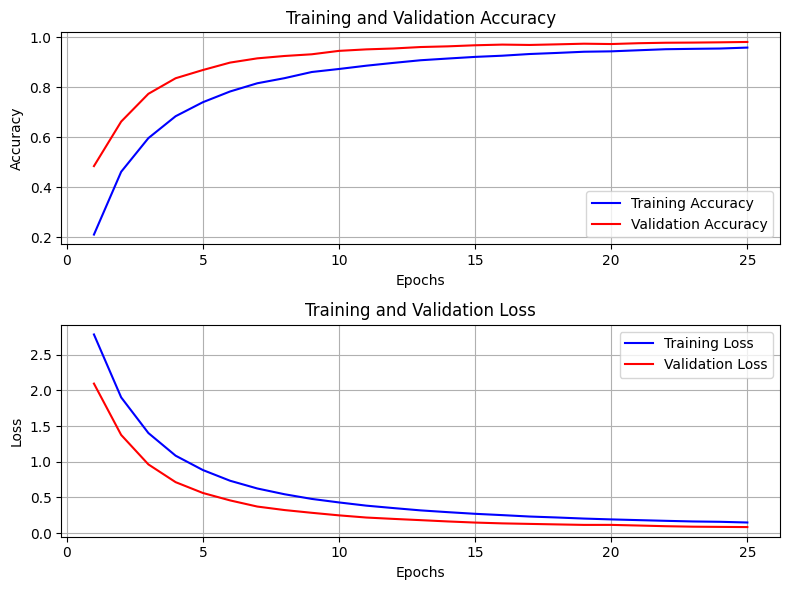

In [ ]:
# Extract data for accuracy and loss from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Create subplots for visualizing the accuracy and loss
plt.figure(figsize=(8, 6))

# Plot accuracy
plt.subplot(2, 1, 1)  # (rows, columns, subplot index)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


---------------------------------------------------------------------------